In [ ]:
from google.colab import files

uploaded = files.upload()

Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['UpdatedResumeDataSet.csv']))
print(df)

         Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('UpdatedResumeDataSet.csv')
data.head(20)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [ ]:
print(data['Category'].unique())

print("total unique category: {}". format(len(data['Category'].unique())))

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
total unique category: 25


In [ ]:
print(data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


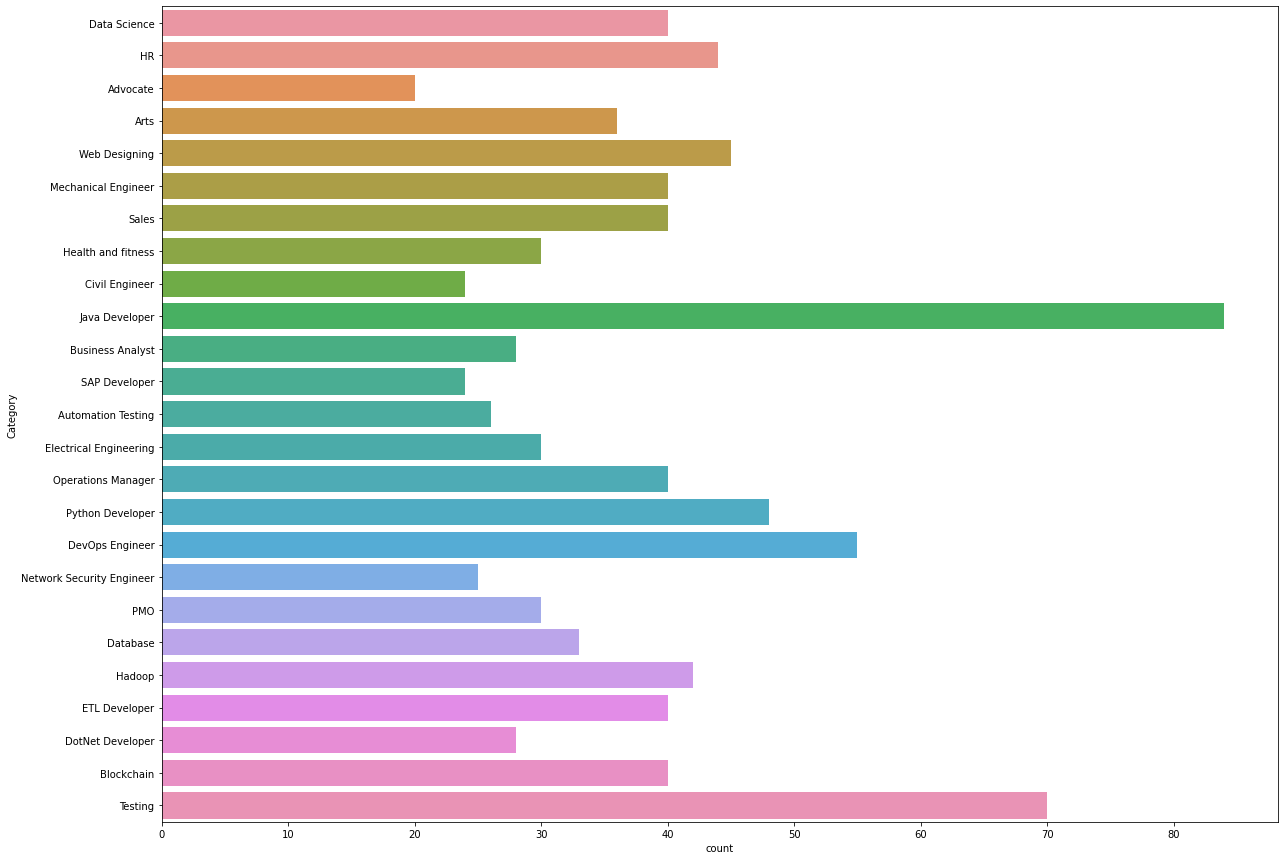

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.countplot(y="Category",data=data)

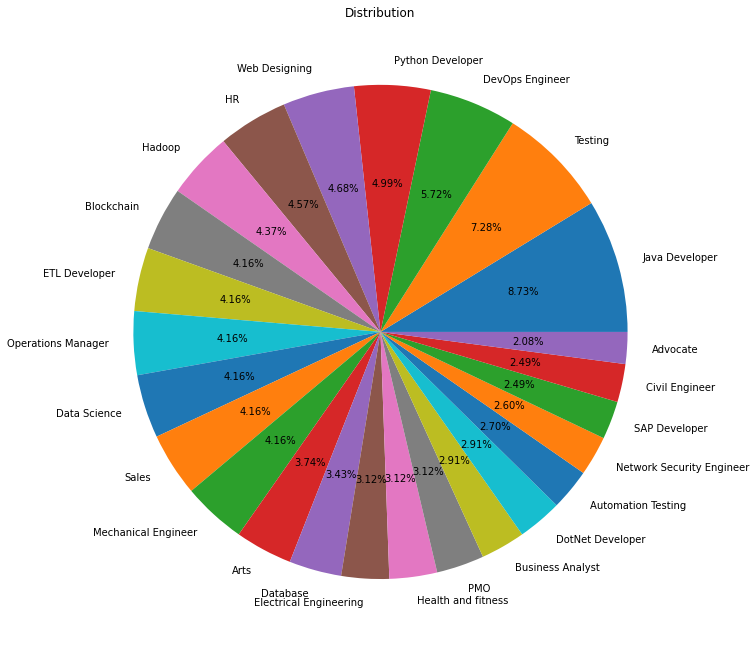

In [ ]:
from matplotlib.gridspec import GridSpec
count=data['Category'].value_counts()
label=data['Category'].value_counts().keys()

plt.figure(1, figsize=(25,25))
grid=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')

color=[cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution')

pie=plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()

In [ ]:
import re

def clean(text):
    text=re.sub('http\S+\s*', ' ', text)
    text=re.sub('RT|cc', ' ', text)
    text=re.sub('#\S+', '', text)
    text=re.sub('@\S+', '', text)
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text=re.sub('\s+', ' ', text)
    text=re.sub(r'[^\x00-\x7f]', r' ', text)
    return text

data['clean text']=data.Resume.apply(lambda x: clean(x))

In [ ]:
data['clean text']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills     R     Python     SAP HANA     Table...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills     Proficient in MS office Wo...
958        Willingness to a ept the challenges     Po...
959    PERSONAL SKILLS     Quick learner     Eagernes...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: clean text, Length: 962, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences=data['Resume'].values
cleanSentences =""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

print(most_common)

[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114), ('24', 111), ('Database', 110), ('development', 105), ('Description', 103), ('Responsibilities', 100), ('S', 100), ('A', 99), ('BOOTSTRAP', 

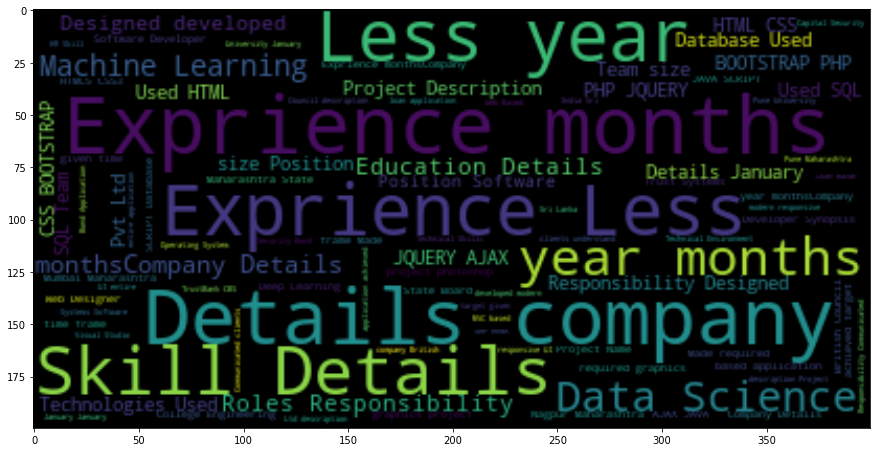

In [ ]:
WC=WordCloud().generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC, interpolation='bilinear')